## NPS

In [1]:
import numpy as np
import pandas as pd
import pytrends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import datetime

In [8]:
df=pd.read_csv('./nps.csv', skiprows=[0,1], thousands=',')
df.ParkName=df.ParkName.str.replace(r' NP.*', ' National Park', regex=True)

In [9]:
len(df.ParkName.unique())

63

In [10]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list=['Acadia National Park']
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
trends_df=pytrends.interest_over_time().drop('isPartial', axis=1)
for name in df.ParkName.unique():
    if name == 'Acadia National Park':
        continue
    kw_list=[name]
    pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
    temp_df = pytrends.interest_over_time().drop('isPartial', axis=1)
    trends_df=trends_df.merge(temp_df, how='left', on='date')
    

In [11]:

for offset in range(4):
    trends_df_working = trends_df.copy(deep=True)
    trends_df_working=trends_df_working.reset_index()
    trends_df_working.date=trends_df_working.date + pd.DateOffset(months=offset)

    trends_df_working['Year']=pd.DatetimeIndex(trends_df_working['date']).year
    trends_df_working['Month']=pd.DatetimeIndex(trends_df_working['date']).month
    trends_df_working.drop(['date'], inplace=True, axis=1)
    trends_df_working=pd.melt(trends_df_working,id_vars=['Year','Month'],var_name='ParkName', value_name='Google_Searches_'+str(offset)+'_months_prior')

    df=df.merge(trends_df_working, how='left', on=['ParkName','Year','Month'])
df.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal,Google_Searches_0_months_prior,Google_Searches_1_months_prior,Google_Searches_2_months_prior,Google_Searches_3_months_prior
0,Acadia National Park,ACAD,National Park,Northeast,ME,2005,1,10810,600,71346,...,0,85815,19302,1157,0,5378,27,16,23,29
1,Acadia National Park,ACAD,National Park,Northeast,ME,2005,2,11831,600,78086,...,0,85815,19302,1157,0,5378,24,27,16,23
2,Acadia National Park,ACAD,National Park,Northeast,ME,2005,3,18917,600,124854,...,0,85815,19302,1157,0,5378,31,24,27,16
3,Acadia National Park,ACAD,National Park,Northeast,ME,2005,4,59773,600,346683,...,0,85815,19302,1157,0,5378,43,31,24,27
4,Acadia National Park,ACAD,National Park,Northeast,ME,2005,5,110330,7500,628052,...,0,85815,19302,1157,0,5378,60,43,31,24


In [12]:
df.to_csv('trends_with_offsets.csv', index=False)

In [13]:
corr_cols = df[['RecreationVisits','Google_Searches_0_months_prior','Google_Searches_1_months_prior', 'Google_Searches_2_months_prior', 'Google_Searches_3_months_prior']]
corr_cols.head()

,RecreationVisits,Google_Searches_0_months_prior,Google_Searches_1_months_prior,Google_Searches_2_months_prior,Google_Searches_3_months_prior
0,10810,27,16,23,29
1,11831,24,27,16,23
2,18917,31,24,27,16
3,59773,43,31,24,27
4,110330,60,43,31,24


In [14]:
corr_cols.corr()

,RecreationVisits,Google_Searches_0_months_prior,Google_Searches_1_months_prior,Google_Searches_2_months_prior,Google_Searches_3_months_prior
RecreationVisits,1.000000,0.368955,0.384278,0.347601,0.278610
Google_Searches_0_months_prior,0.368955,1.000000,0.795830,0.694383,0.583507
Google_Searches_1_months_prior,0.384278,0.795830,1.000000,0.790680,0.689416
Google_Searches_2_months_prior,0.347601,0.694383,0.790680,1.000000,0.785446
Google_Searches_3_months_prior,0.278610,0.583507,0.689416,0.785446,1.000000


In [2]:
#dateparse = lambda y,m: datetime.strptime(y,m, '%Y-%m')

#single_park = pd.read_csv('trends_with_offsets.csv', parse_dates={'datetime': ['Year', 'Month']}, date_parser=dateparse)

single_park=pd.read_csv('trends_with_offsets.csv')
park='Isle Royale National Park'
single_park = single_park.loc[single_park['ParkName']==park]
single_park['date']=single_park.Year.astype(str)+single_park.Month.astype(str)
single_park['date']=pd.to_datetime(single_park['date'], format='%Y%m')
single_park

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,RecreationHours,...,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal,Google_Searches_0_months_prior,Google_Searches_1_months_prior,Google_Searches_2_months_prior,Google_Searches_3_months_prior,date
6527,Isle Royale National Park,ISRO,National Park,Midwest,MI,2005,1,39,0,39,...,4928,0,36889,52,3670,20,0,0,0,2005-01-01
6528,Isle Royale National Park,ISRO,National Park,Midwest,MI,2005,2,33,0,33,...,4928,0,36889,52,3670,0,20,0,0,2005-02-01
6529,Isle Royale National Park,ISRO,National Park,Midwest,MI,2005,3,77,0,77,...,4928,0,36889,52,3670,38,0,20,0,2005-03-01
6530,Isle Royale National Park,ISRO,National Park,Midwest,MI,2005,4,78,0,266,...,4928,0,36889,52,3670,100,38,0,20,2005-04-01
6531,Isle Royale National Park,ISRO,National Park,Midwest,MI,2005,5,689,13,54366,...,4928,0,36889,52,3670,68,100,38,0,2005-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,Isle Royale National Park,ISRO,National Park,Midwest,MI,2021,8,7513,22,491746,...,6450,0,32128,852,11102,44,37,38,28,2021-08-01
6727,Isle Royale National Park,ISRO,National Park,Midwest,MI,2021,9,3272,11,172534,...,6450,0,32128,852,11102,29,44,37,38,2021-09-01
6728,Isle Royale National Park,ISRO,National Park,Midwest,MI,2021,10,232,4,168,...,6450,0,32128,852,11102,20,29,44,37,2021-10-01
6729,Isle Royale National Park,ISRO,National Park,Midwest,MI,2021,11,0,0,0,...,6450,0,32128,852,11102,16,20,29,44,2021-11-01


In [3]:
norm_max=single_park['RecreationVisits'].max()
single_park['RecVisitNormalized']= single_park['RecreationVisits']/norm_max*100

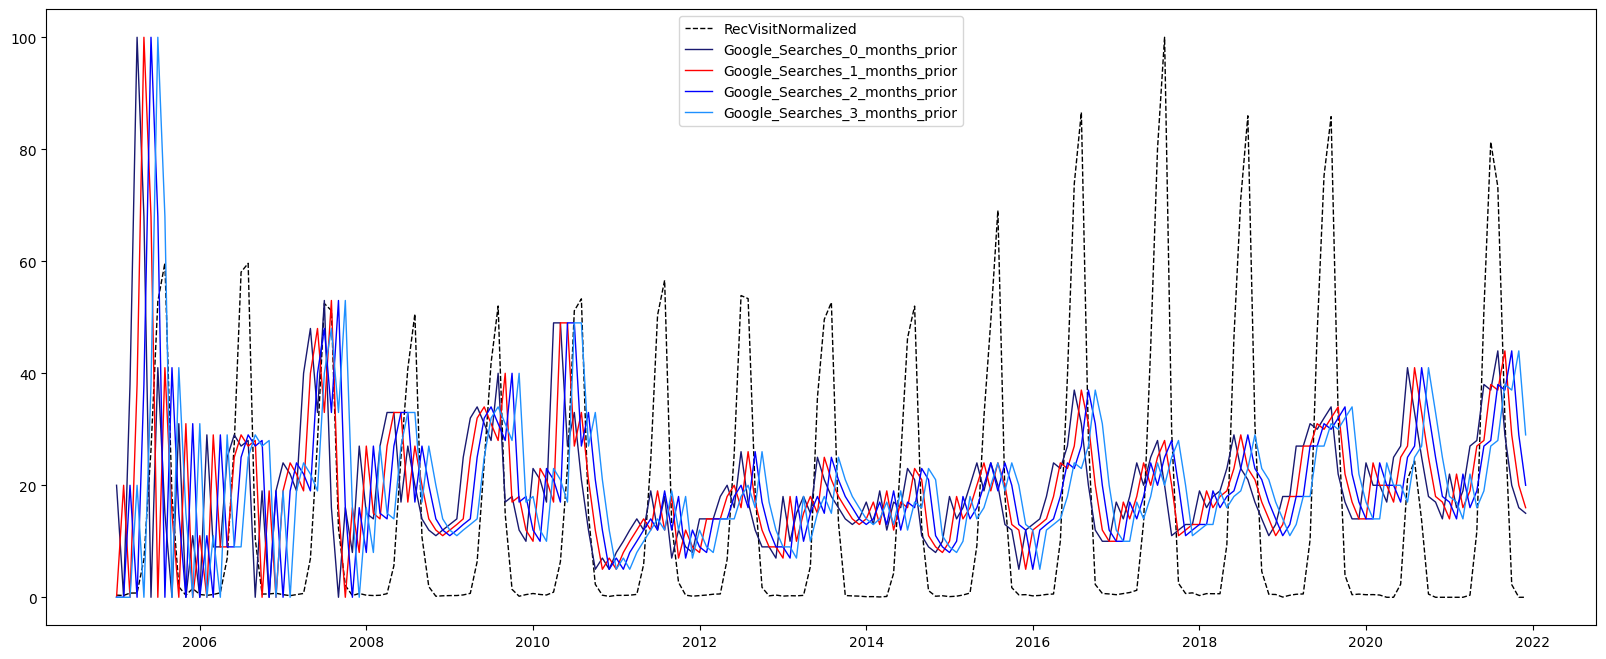

In [4]:
#single_park['date'] = single_park['Month'].map(str)+ '-' +single_park['Year'].map(str)
#single_park['date'] = pd.to_datetime(single_park['date'], format='%m-%Y').dt.strftime('%m-%Y')
plt.subplots(figsize=(20,8))

plt.plot( 'date', 'RecVisitNormalized', data=single_park, marker='', color='Black', linewidth=1, linestyle='dashed')
plt.plot( 'date', 'Google_Searches_0_months_prior', data=single_park, marker='', color='midnightblue', linewidth=1)
plt.plot( 'date', 'Google_Searches_1_months_prior', data=single_park, marker='', color='red', linewidth=1)
plt.plot( 'date', 'Google_Searches_2_months_prior', data=single_park, marker='', color='blue', linewidth=1)
plt.plot( 'date', 'Google_Searches_3_months_prior', data=single_park, marker='', color='dodgerblue', linewidth=1)

plt.legend()
plt.show()

In [ ]:
#df.to_csv('NPS_with_trends.csv', index=False)

intergrate weather trends